<h2>Desafio 4 - Trabajo Final</h2>

<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marcelo Carrizo</li>
    
</ul>
<h3>Clustering


<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Análisis de outliers](#section_ouliers)

[Clustering con Kmeans](#section_cluster)

<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [1]:
import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist,squareform
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [2]:
df = pd.read_csv('Data/co2_emissions_clean.csv')

In [3]:
df.head(5)

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,5 Puertas,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,5 Puertas,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,Coupe,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


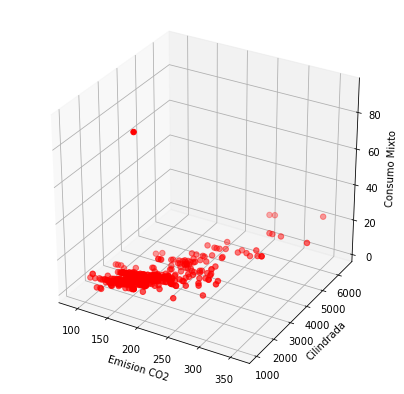

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
 
media_z = (df.emision_CO2).mean()
std_z = (df.emision_CO2).std()*2
 
for index, x in enumerate(df.emision_CO2):
    if abs(x-media_z) > std_z:
        colors = 'red'
 
ax.scatter(df.emision_CO2, df.vehiculo_cilindrada, df.consumo_urbano, s=30, c=colors,norm='Normalize')
plt.xlabel('Emision CO2')
plt.ylabel('Cilindrada')
ax.set_zlabel('Consumo Mixto')
 
plt.show()

In [ ]:
#sns.pairplot(df,hue='emision_CO2');

In [ ]:
# !pip install pyod  # instala la librería

<a id="section_outliers"></a> 
<h3>Análisis de outliers</h3>

[volver a TOC](#section_toc)

In [7]:
#Trato de indentificar Outliers para eliminar y mejorar el Clustering.
# https://www.aprendemachinelearning.com/deteccion-de-outliers-en-python-anomalia/
from pyod.models.knn import KNN

In [8]:
X = df.filter(['vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
#X.loc[500] = [50000, 340, 22, 20, 5]

In [9]:
clf = KNN(contamination=0.18)
clf.fit(X)

KNN(algorithm='auto', contamination=0.18, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [10]:
y_pred = clf.predict(X)
index_outliers = X[y_pred == 1]
X[y_pred == 1]

,vehiculo_cilindrada,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,4461.0,260.70,11.56,8.94,9.90
6,3456.0,145.00,6.60,5.90,6.20
13,1248.0,136.64,7.46,4.97,5.89
39,1798.0,88.00,3.70,3.80,3.80
46,1560.0,99.90,4.60,3.50,3.90
57,6162.0,260.00,17.40,7.80,11.30
58,6162.0,269.00,18.10,8.10,11.70
77,999.0,126.67,6.90,4.58,5.44
80,2891.0,187.98,12.42,5.72,8.15
83,2393.0,197.00,8.90,6.60,7.50


In [6]:
vehiculos_outliers = df.loc[index_outliers.index.tolist(), :]
vehiculos_outliers 


,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
6,LEXUS,GS450H,4 Puertas,4x2,3456.0,CVT,NAFTA / ELECTRICIDAD,EURO V,145.00,6.60,5.90,6.20
13,HYUNDAI,GRAND i10,5 Puertas,4x2,1248.0,MANUAL,NAFTA,EURO V,136.64,7.46,4.97,5.89
39,TOYOTA,PRIUS,5 Puertas,4x2,1798.0,CVT,NAFTA,EURO V,88.00,3.70,3.80,3.80
46,PEUGEOT,208,5 Puertas,4x2,1560.0,MANUAL,GAS OIL,EURO V,99.90,4.60,3.50,3.90
57,CHEVROLET,CAMARO 6.2,Coupe,4x2,6162.0,AUTOMATICA,NAFTA,EURO VI a,260.00,17.40,7.80,11.30
58,CHEVROLET,CAMARO 6.2,Coupe,4x2,6162.0,AUTOMATICA,NAFTA,EURO VI a,269.00,18.10,8.10,11.70
77,VOLKSWAGEN,UP! - UP! TSI,4 Puertas,4x2,999.0,MANUAL,NAFTA,EURO V,126.67,6.90,4.58,5.44
80,ALFA ROMEO,GIULIA QUADRIFOGLIO,4 Puertas,4x2,2891.0,AUTOMATICA,NAFTA,EURO VI b,187.98,12.42,5.72,8.15
83,TOYOTA,HILUX,PICK UP,4x2 - 4x4,2393.0,MANUAL,GAS OIL,EURO V,197.00,8.90,6.60,7.50


In [11]:
vehiculos_outliers.shape

(49, 12)

In [12]:
X.shape

(406, 5)

In [13]:
vehiculos_analisis = df.drop(index_outliers.index.tolist(), axis=0)

In [49]:
vehiculos_analisis.reset_index(inplace=True, drop =True)

In [50]:
vehiculos_analisis.shape

(357, 12)

In [51]:
vehiculo_combustible_df = vehiculos_analisis.filter(['vehiculo_tipo_combustible','vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
vehiculo_combustible_df.dtypes

vehiculo_tipo_combustible     object
vehiculo_cilindrada          float64
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
dtype: object

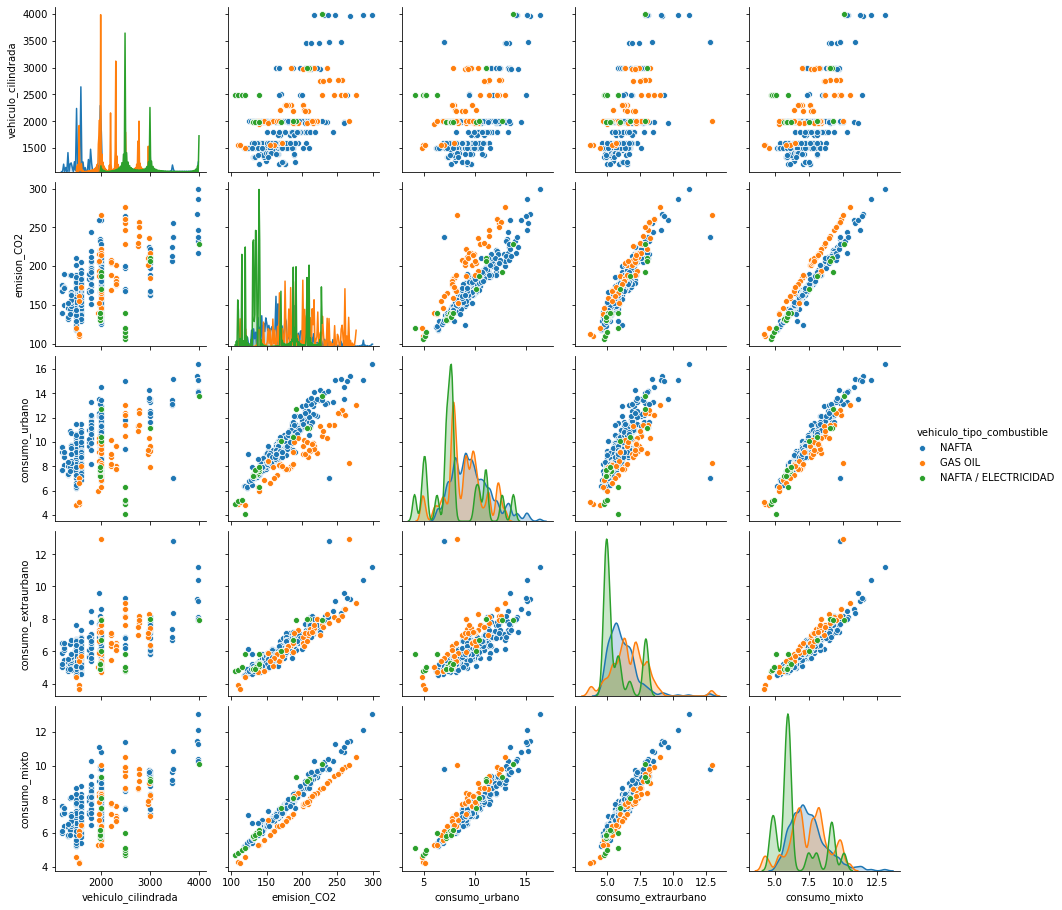

In [16]:
sns.pairplot(vehiculo_combustible_df, hue='vehiculo_tipo_combustible', diag_kws={'bw': 0.2});

In [ ]:
#vehiculo_tipo_df = df.filter(['vehiculo_tipo','vehiculo_cilindrada','emision_CO2','consumo_urbano','consumo_extraurbano','consumo_mixto'], axis=1)
#sns.pairplot(vehiculo_tipo_df, hue='vehiculo_tipo', diag_kws={'bw': 0.2});

In [52]:
vehiculos_analisis.vehiculo_tipo.value_counts()

4 Puertas    90
5 Puertas    79
Rural        44
SUV          44
Coupe        42
PICK UP      39
Furgon        6
Camion        6
BUS           4
4x4           3
Name: vehiculo_tipo, dtype: int64

In [53]:
vehiculos_analisis.vehiculo_tipo.unique()

array(['4 Puertas', '5 Puertas', 'Coupe', 'SUV', 'Camion', 'PICK UP',
       'Furgon', '4x4', 'Rural', 'BUS'], dtype=object)

<a id="section_cluster"></a> 
<h3>Clustering con KMeans</h3>

[volver a TOC](#section_toc)

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [119]:
X1=vehiculos_analisis[['emision_CO2','vehiculo_cilindrada']]

scaler=StandardScaler()

X1_scaled=scaler.fit_transform(X1);

In [120]:
kmeans=KMeans(n_clusters=4,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans.fit(X1_scaled)


KMeans(n_clusters=4, random_state=0)

In [121]:
labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides


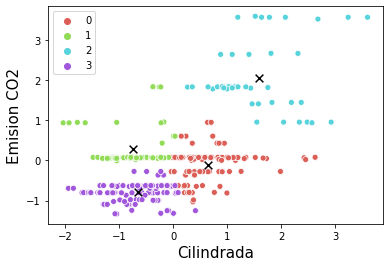

In [123]:
sns.scatterplot(x=X1_scaled[:,0],y=X1_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 4));
plt.xlabel('Cilindrada',fontsize=15);plt.ylabel('Emision CO2',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=60,color='k');

In [59]:
from mpl_toolkits.mplot3d import Axes3D

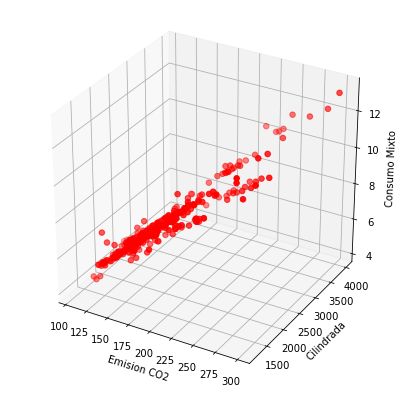

In [60]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
 
media_z = (vehiculos_analisis.emision_CO2).mean()
std_z = (vehiculos_analisis.emision_CO2).std()*2
 
for index, x in enumerate(vehiculos_analisis.emision_CO2):
    if abs(x-media_z) > std_z:
        colors = 'red'
 
ax.scatter(vehiculos_analisis.emision_CO2, vehiculos_analisis.vehiculo_cilindrada,vehiculos_analisis.consumo_mixto, s=30, c=colors,norm='Normalize')
plt.xlabel('Emision CO2')
plt.ylabel('Cilindrada')
ax.set_zlabel('Consumo Mixto')
 
plt.show()

In [61]:
vehiculos_analisis

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
1,RENAULT,DUSTER 2.0 16v,5 Puertas,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
2,RENAULT,DUSTER 2.0 16v 4X4,5 Puertas,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
3,CITROËN,DS4,Coupe,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70
4,CITROËN,DS3,Coupe,4x2,1598.0,MANUAL,NAFTA,EURO V,140.80,8.20,4.70,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...
352,PORSCHE,911 CARRERA S (CB22) / 911 CARRERA 4S (KB12 KB22),Coupe,4x2 - 4x4,2981.0,AUTOMATICA,NAFTA,EURO V,213.40,13.60,7.30,9.60
353,FORD,KUGA 2.5L FHEV,SUV,4x2,2488.0,E-CVT (Hibrida controlada electrónicamente),NAFTA / ELECTRICIDAD,EURO V,120.00,4.10,5.80,5.10
354,VOLKSWAGEN,BEETLE,Coupe,4x2,1984.0,AUTOMATICA,NAFTA,EURO V,186.90,10.50,6.50,8.00
355,VOLKSWAGEN,BEETLE,Coupe,4x2,1390.0,MANUAL,NAFTA,EURO V,163.10,9.00,5.80,7.00


In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [126]:
X2=vehiculos_analisis[['emision_CO2','vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']]

scaler2=StandardScaler()

X2_scaled=scaler2.fit_transform(X2);

In [127]:
kmeans2=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans2.fit(X2_scaled)


KMeans(n_clusters=3, random_state=0)

In [128]:
labels = kmeans2.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans2.cluster_centers_ # Coordenadas de los centroides

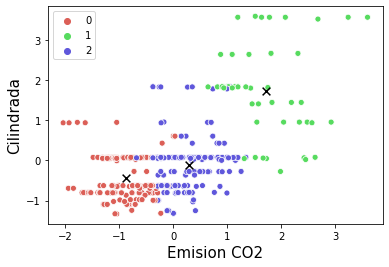

In [130]:
sns.scatterplot(x=X2_scaled[:,0],y=X2_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 3));
plt.xlabel('Emision CO2',fontsize=15);plt.ylabel('Cilindrada',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=60,color='k');

In [67]:
dummies_combustible = pd.get_dummies(vehiculos_analisis['vehiculo_tipo_combustible'], prefix='combustible', prefix_sep='_')

In [68]:
dummies_combustible

,combustible_GAS OIL,combustible_NAFTA,combustible_NAFTA / ELECTRICIDAD
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
352,0,1,0
353,0,0,1
354,0,1,0
355,0,1,0


In [69]:
type(dummies_combustible)

pandas.core.frame.DataFrame

In [131]:
num_columns = ['vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']

In [132]:
X_num=vehiculos_analisis[num_columns]

In [133]:
scaler=StandardScaler()

In [134]:
X_scaled= pd.DataFrame(scaler.fit_transform(X_num), columns = num_columns)

In [135]:
X_scaled

,vehiculo_cilindrada,consumo_urbano,consumo_extraurbano,consumo_mixto
0,0.074800,0.473086,-0.123125,0.188202
1,0.076559,0.783223,0.595851,0.786791
2,0.076559,0.817682,0.620361,0.808691
3,-0.627230,0.522314,-0.204827,0.188202
4,-0.627230,-0.659160,-1.266950,-1.052776
...,...,...,...,...
352,1.806122,1.999156,0.857296,1.575177
353,0.938702,-2.677510,-0.368230,-1.709765
354,0.051927,0.473086,0.203682,0.407198
355,-0.993201,-0.265335,-0.368230,-0.322789


In [136]:
X_scaled.shape

(357, 4)

In [137]:
type(X_scaled)

pandas.core.frame.DataFrame

In [138]:
X = pd.concat([X_scaled, dummies_combustible], axis=1)

In [139]:
X.shape

(357, 7)

In [140]:
X.head()

,vehiculo_cilindrada,consumo_urbano,consumo_extraurbano,consumo_mixto,combustible_GAS OIL,combustible_NAFTA,combustible_NAFTA / ELECTRICIDAD
0,0.074800,0.473086,-0.123125,0.188202,0,1,0
1,0.076559,0.783223,0.595851,0.786791,0,1,0
2,0.076559,0.817682,0.620361,0.808691,0,1,0
3,-0.627230,0.522314,-0.204827,0.188202,0,1,0
4,-0.627230,-0.659160,-1.266950,-1.052776,0,1,0


In [141]:

kmeans3=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10
kmeans3.fit(X)


KMeans(n_clusters=3, random_state=0)

In [142]:
labels = kmeans3.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans3.cluster_centers_ # Coordenadas de los centroides

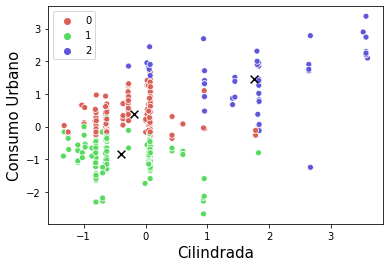

In [117]:
sns.scatterplot(x=X['vehiculo_cilindrada'],y=X['consumo_urbano'],hue=labels,legend='full',palette=sns.color_palette("hls", 3));
plt.xlabel('Cilindrada',fontsize=15);plt.ylabel('Consumo Urbano',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=60,color='k');